This is a test

In [7]:
import cv2
import imutils
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread("photos/Image3_54paquets.jpg")

True

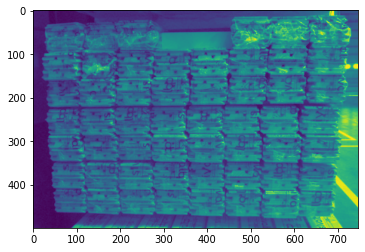

In [51]:
image = imutils.resize(img, height=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
cv2.imwrite('gray.jpg', gray) 

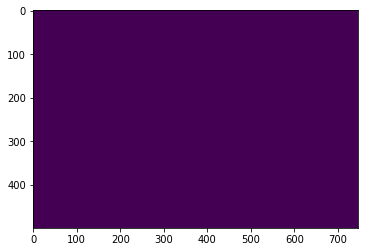

In [73]:
low_gray = (0,0,0)
high_gray = (255, 255, 255)
frame_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imwrite('frame_HSV.jpg', frame_HSV) 
# create masks
gray_mask = cv2.inRange(frame_HSV, low_gray, high_gray)


plt.imshow(gray_mask)

True

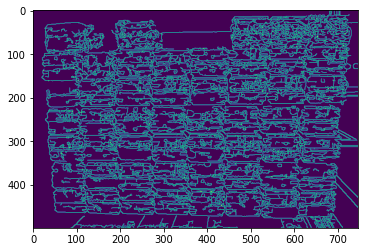

In [87]:
#blurred = cv2.GaussianBlur(gray.copy(), (5, 5), 0)
edged = cv2.Canny(gray.copy(), 50, 200)

plt.imshow(edged)
cv2.imwrite('edged.jpg', edged) 

True

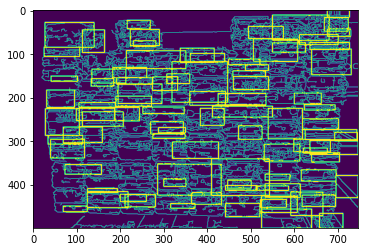

In [88]:
edgedWithBox = edged.copy()

cnts = cv2.findContours(edgedWithBox, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
packetsCnts = []

# loop over the digit area candidates
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # if the contour is sufficiently large, it must be a digit
    if w >= 50 and h >= 10 and w <= 150 and h <= 150:
        packetsCnts.append(c)
        cv2.rectangle(edgedWithBox,(x,y),(x+w,y+h),(255,255,0),2)

plt.imshow(edgedWithBox)
cv2.imwrite('edgedWithBox.jpg', edgedWithBox) 